In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

from ipywidgets import interact
import ipywidgets as widgets

# Conditional Probability

## Probability as area

In this notebook, we will introduce concepts of conditional probability and the Bernoulli distribution. First, let us develop some geometrical intuitions. In order to do that, we have to become familiar with the idea that we can visualize probability as area. In the following plot, the area painted in blue relative to the total area of the square is the probability that a random variable $A$ is equal to $0$: $P(A = 0)$. Since in our example $A$ is binary, it can only be $0$ or $1$ and thus $P(A = 1) = 1 - P(A = 0)$.

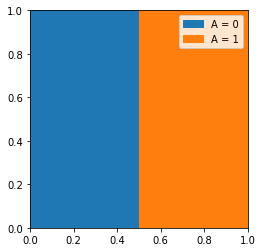

In [3]:
@interact(pA=widgets.FloatSlider(min=0., max=1., value=0.5, description="P(A=1)"))
def plot_areas(pA):
    f, ax = plt.subplots()
    ax.set_aspect("equal")

    A0 = Rectangle(xy=[0, 0], width=1-pA, height=1., color="C0", label="A = 0")
    A1 = Rectangle(xy=[1-pA, 0], width=pA, height=1., color="C1", label="A = 1")
    ax.add_patch(A0)
    ax.add_patch(A1)
    ax.legend()

When you increase $P(A = 1)$, the fraction of the area that is occupied by the cases in which $A = 1$ increases.

## Conditional probability

We now introduce the concept of conditional probability. Conditional probabiltiy is the probability of one event given that you know (or assume) another event has happened. More formally, we speak of the probability of B given A, which we write as $P(B | A)$. It is defined as

\begin{align}
     P(B | A) = \frac{P(B, A)}{P(A)},
\end{align}

i.e. the probability of B and A divided by the probability of $A$. Let's visualize this. In the following interactive plot, the variable $B$ is indicated by a lighter color of the area. The joint probability $P(B = 1, A = 0)$ is the light blue area: the area in which both $A = 0$ AND $B = 1$. The conditional probability $P(B = 1 | A = 0)$ is a relative quantity. It is the fraction of the blue area $P(A = 0)$, in which $B = 1$. In other words: of all the cases: if we know that $A = 0$, we only have to look at the blue part of our space. The conditional probability tells us, in which of these cases $B$ takes some particularly value. 

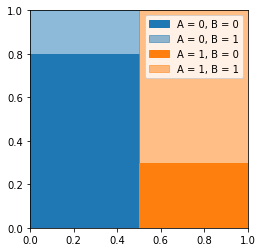

In [4]:
@interact(pAis1=widgets.FloatSlider(min=0., max=1., value=0.5, description="P(A=1)"),
         pBis1_given_Ais0=widgets.FloatSlider(min=0., max=1, value=0.2, description="P(B=1 | A=0)"),
         pBis1_given_Ais1=widgets.FloatSlider(min=0., max=1, value=0.7, description="P(B=1 | A=1)"))
def plot_areas(pAis1, pBis1_given_Ais0, pBis1_given_Ais1):
    f, ax = plt.subplots()
    ax.set_aspect("equal")
    
    # probability of A
    pA = np.array([1 - pAis1, pAis1])
    
    # conditional probability table for B given A
    pB_given_A = np.array([[1 - pBis1_given_Ais0, pBis1_given_Ais0], 
                          [1 - pBis1_given_Ais1, pBis1_given_Ais1]])


    A0B0 = Rectangle(xy=[0, 0], width=pA[0], height=pB_given_A[0, 0], color="C0", label="A = 0, B = 0")
    A0B1 = Rectangle(xy=[0, pB_given_A[0, 0]], width=pA[0], height=pB_given_A[0, 1], color="C0", 
                     label="A = 0, B = 1", alpha=0.5)
    
    A1B0 = Rectangle(xy=[pA[0], 0], width=pA[1], height=pB_given_A[1, 0], color="C1", label="A = 1, B = 0")
    A1B1 = Rectangle(xy=[pA[0], pB_given_A[1, 0]], width=pA[1], height=pB_given_A[1, 1], color="C1", 
                     label="A = 1, B = 1", alpha=0.5)
    
    # add rectangles to canvas
    [ax.add_patch(patch) for patch in [A0B0, A0B1, A1B0, A1B1]]

    ax.legend()

## Independence

Two RVs are said to be independent if 

\begin{align}
    P(B | A) = P(B)
\end{align}

What does this mean? Knowing a tells us nothing about B. In our area example, you can see that if $B$ is independent of $A$, the fraction of the area that is lighter is the same, no matter the color. This is precisely the definition of independence, which we stated mathematically above.

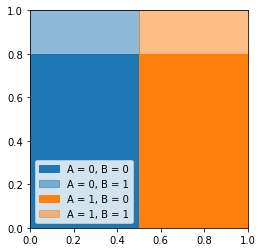

In [5]:
@interact(pAis1=widgets.FloatSlider(min=0., max=1., value=0.5, description="P(A=1)"),
         pBis1=widgets.FloatSlider(min=0., max=1, value=0.2, description="P(B=1)"))
def plot_areas_independent(pAis1, pBis1):
    f, ax = plt.subplots()
    ax.set_aspect("equal")
    
    # probability of A
    pA = np.array([1 - pAis1, pAis1])
    
    # conditional probability table for B given A
    pB = np.array([1 - pBis1, pBis1])


    A0B0 = Rectangle(xy=[0, 0], width=pA[0], height=pB[0], color="C0", label="A = 0, B = 0")
    A0B1 = Rectangle(xy=[0, pB[0]], width=pA[0], height=pB[1], color="C0", 
                     label="A = 0, B = 1", alpha=0.5)
    
    A1B0 = Rectangle(xy=[pA[0], 0], width=pA[1], height=pB[0], color="C1", label="A = 1, B = 0")
    A1B1 = Rectangle(xy=[pA[0], pB[0]], width=pA[1], height=pB[1], color="C1", 
                     label="A = 1, B = 1", alpha=0.5)
    
    # add rectangles to canvas
    [ax.add_patch(patch) for patch in [A0B0, A0B1, A1B0, A1B1]]

    ax.legend()

An equivalent definition of indpendence is

\begin{align}
    P(A, B) = P(A) P(B).
\end{align}

This follows from the rules of probability. First, we use the chain rule and then plug in our definition from above:

\begin{align}
    P(A, B) = P(A) P(B | A) = P(A) P(B).
\end{align}

Another important rule, which we will need later is the sum rule:

\begin{align}
P(B) = \sum_A P(A, B) = \sum_A P(B | A) P(A).
\end{aling}

These are all the rules of probability we will need in this class. The rest follows from these.